# Introduction
Distance learning (DL) is an educational process using technologies that provide communication between students and teachers at a distance, without direct contact.

Distance learning is the interaction of a teacher and students with each other at a distance, reflecting all the components inherent in the educational process (goals, content, methods, organizational forms, teaching aids) and implemented by specific means of Internet technologies or other means that provide for interactivity.

Distance learning is an independent form of learning, information technology in distance learning is the leading tool.

### Advantages:
* the cost of distance learning is slightly lower than traditional education, since there may be no rent for renting premises for classes, the costs of organizing the classes themselves are reduced, there is an opportunity for each teacher to simultaneously study with a slightly larger number of students and some other factors that directly or indirectly affect on the total cost of education;
* reduce training time (collection, travel time);
* distance learning can be of an individual nature, and therefore provide an opportunity to more effectively set up the learning process, enabling the student to choose a convenient time and pace of learning for himself;
* improve the quality of education through the use of modern tools, voluminous electronic libraries, etc. create a unified educational environment (especially relevant for corporate training);
* this format of training is extremely convenient for people with disabilities;
a person can simultaneously study in more than one educational organization and / or in more than one direction in a short time;
* there is an opportunity to continuously improve the level of one's own qualifications;
* the active use of images, text, sound and video in the educational material significantly improves the quality of assimilation of new information;


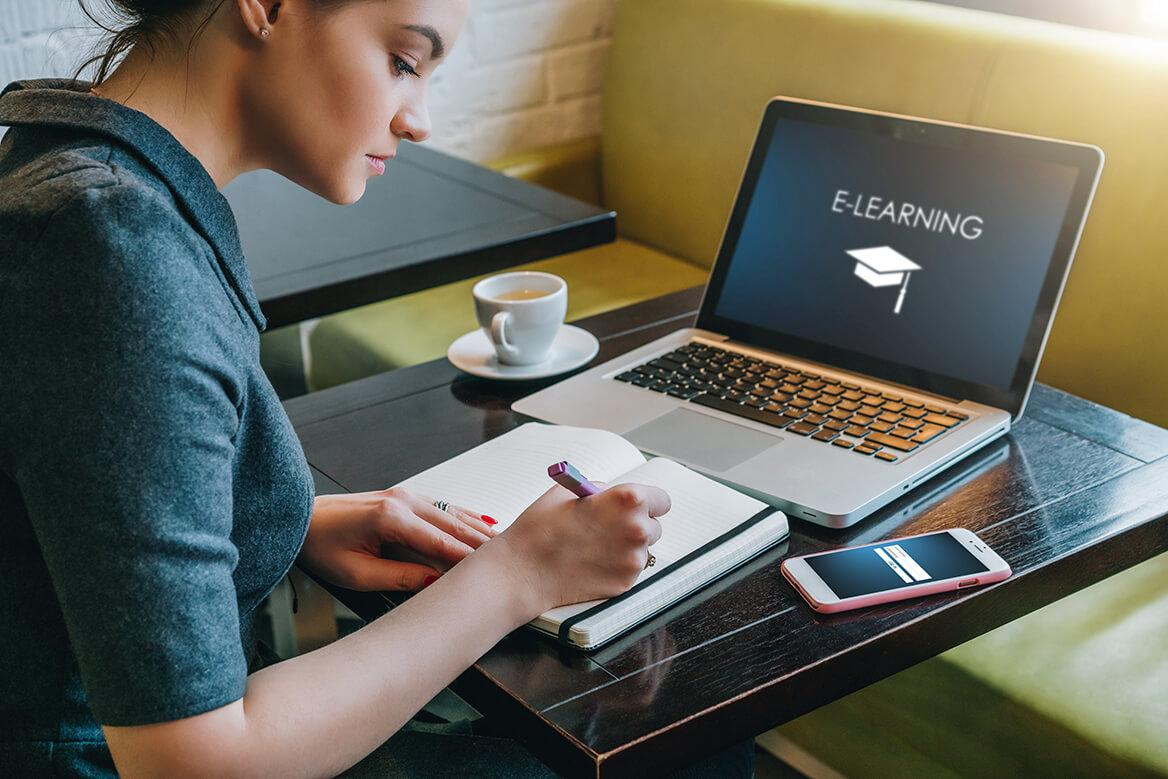

# Importing the necessary libraries and data for EDA

In [10]:
# %pip install --upgrade pip 
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [40]:
train = pd.read_csv("./data/students_adaptability_level_online_education.csv")

# We will conduct an exploratory data analysis

In [12]:
train

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,Girl,16-20,College,Non Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Low
1201,Girl,16-20,College,Non Government,No,No,High,Mid,Wifi,4G,3-6,No,Mobile,Moderate
1202,Boy,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,3G,1-3,No,Mobile,Moderate
1203,Girl,16-20,College,Non Government,No,No,Low,Mid,Wifi,4G,1-3,No,Mobile,Low


The table consists of 1205 rows and 14 columns

## Need to look at the data type

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gender               1205 non-null   object
 1   Age                  1205 non-null   object
 2   Education Level      1205 non-null   object
 3   Institution Type     1205 non-null   object
 4   IT Student           1205 non-null   object
 5   Location             1205 non-null   object
 6   Load-shedding        1205 non-null   object
 7   Financial Condition  1205 non-null   object
 8   Internet Type        1205 non-null   object
 9   Network Type         1205 non-null   object
 10  Class Duration       1205 non-null   object
 11  Self Lms             1205 non-null   object
 12  Device               1205 non-null   object
 13  Adaptivity Level     1205 non-null   object
dtypes: object(14)
memory usage: 131.9+ KB


All columns have a string data type, which indicates that only categorical features are present.

## You need to check the table for information gaps.

In [14]:
train.isnull().sum()

Gender                 0
Age                    0
Education Level        0
Institution Type       0
IT Student             0
Location               0
Load-shedding          0
Financial Condition    0
Internet Type          0
Network Type           0
Class Duration         0
Self Lms               0
Device                 0
Adaptivity Level       0
dtype: int64

## You need to look at the statistics of the dataset.

In [15]:
train.describe().T

,count,unique,top,freq
Gender,1205,2,Boy,663
Age,1205,6,21-25,374
Education Level,1205,3,School,530
Institution Type,1205,2,Non Government,823
IT Student,1205,2,No,901
Location,1205,2,Yes,935
Load-shedding,1205,2,Low,1004
Financial Condition,1205,3,Mid,878
Internet Type,1205,2,Mobile Data,695
Network Type,1205,3,4G,775


## Let's start a mini-analysis of the data by constructing a general distribution of features by their number.

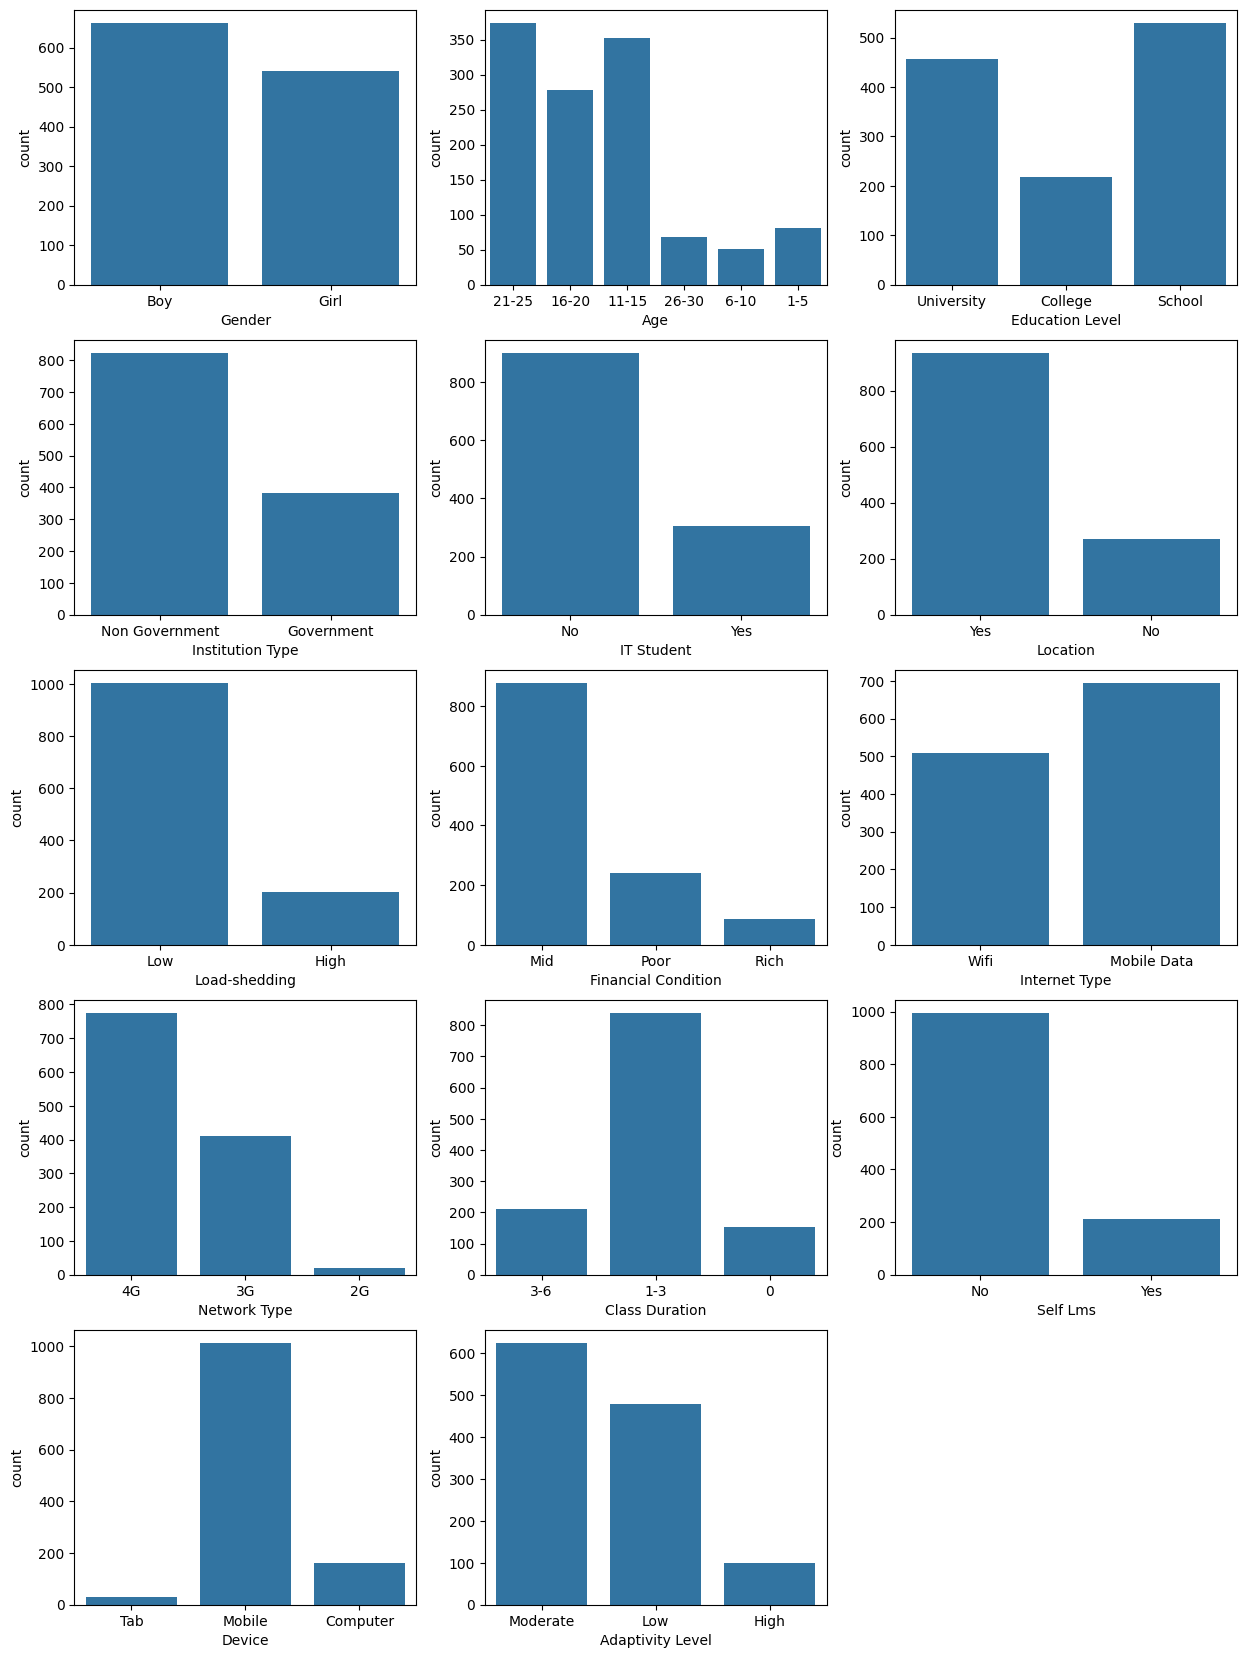

In [16]:
i = 1
plt.figure(figsize = (15,25))
for feature in train:
    plt.subplot(6,3,i)
    sns.countplot(x = feature ,  data = train)
    i +=1

Conclusions from the presented graphs:
* Variable study Gender is balanced, applied to the same number of men and women to obtain a relevant result.
* most of the subjects correspond to the age of 11–25 years, this is the age when we can confidently talk about sustainable adaptation to learning.
* values ​​are contributed by the level of education indicates that most of the subjects have only a school education. These data correlate with a certain schedule, where most of the subjects are in the age range from 7 to 20 years.
*existing education services are provided by non-private institutions. This is due to the development of the education market.
* it should also be noted that most of the commercials are sold on the phone through the 4G network, which shows that people get education in any place convenient for them.
* It should be noted that some of the online courses are not assimilated by students.

## Let's study the distribution of the number of students depending on the level of their adaptation.

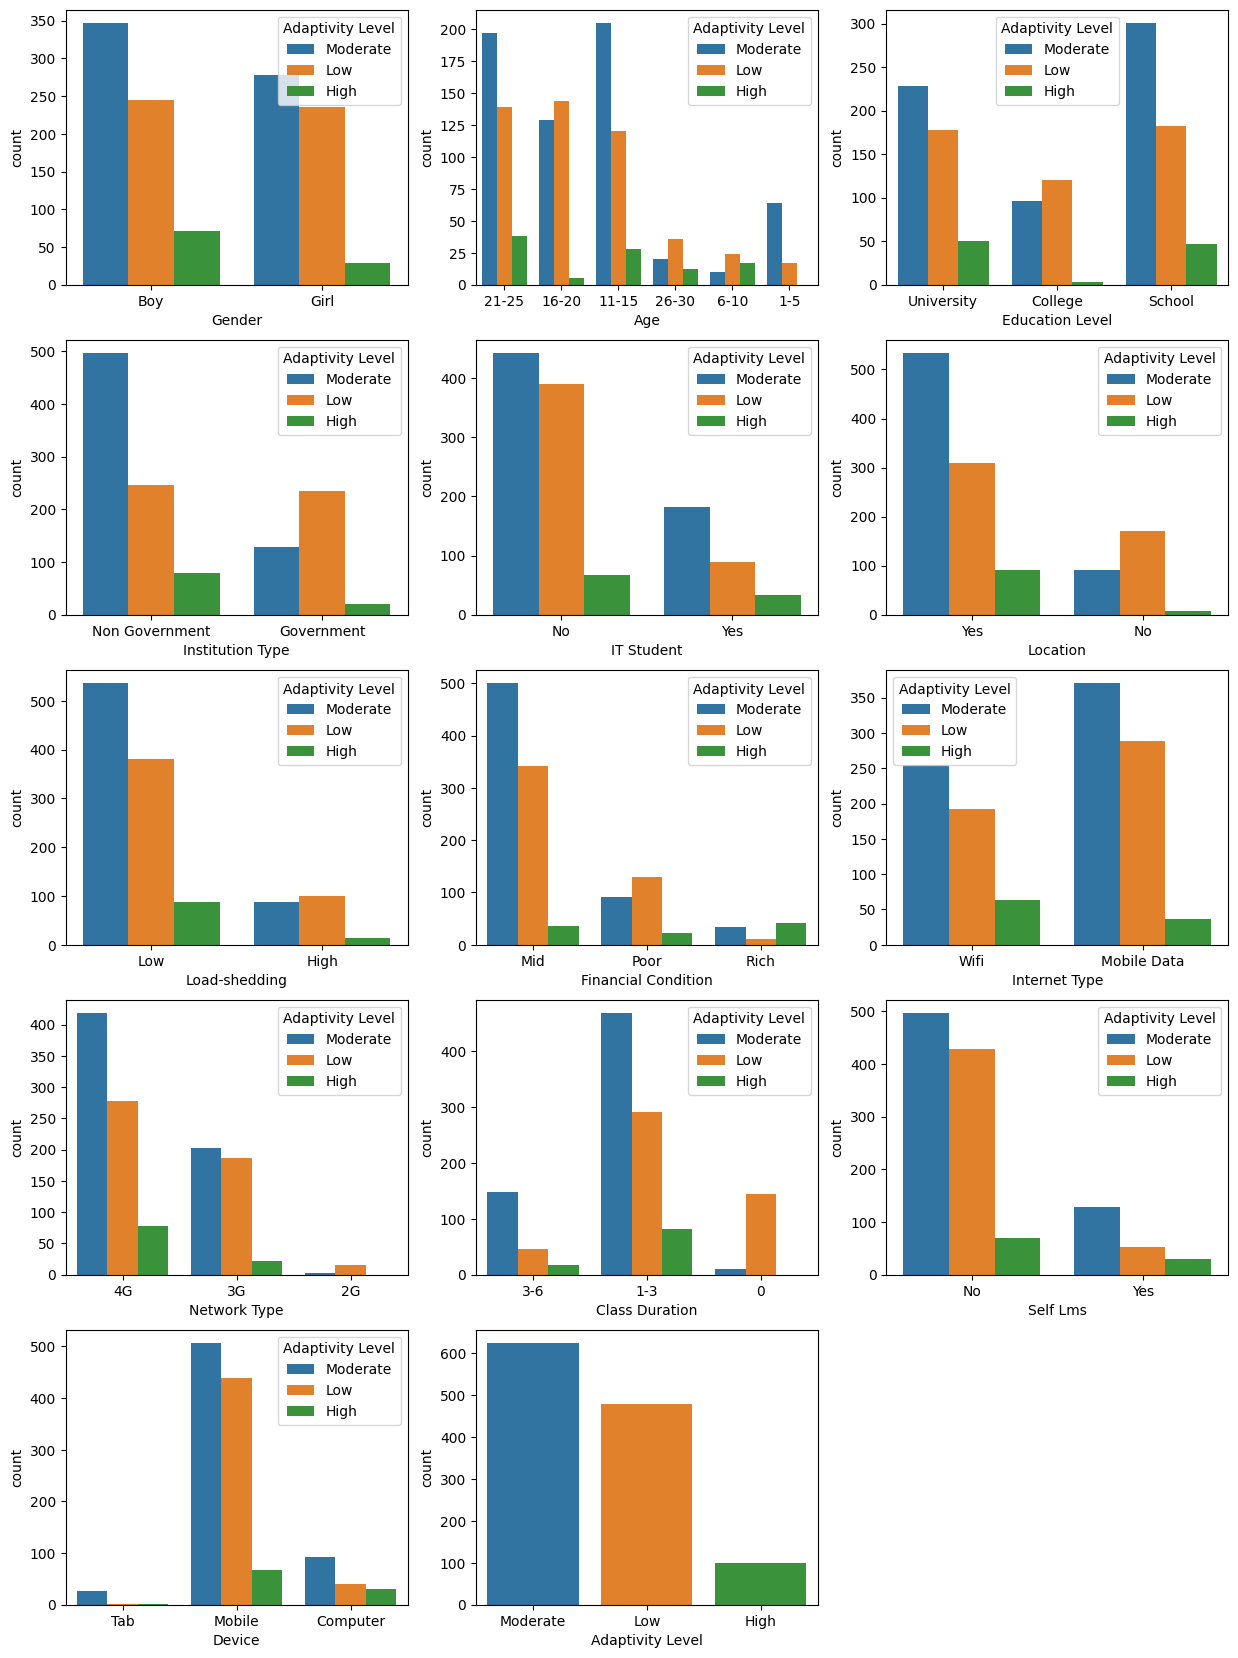

In [17]:
i = 1
plt.figure(figsize = (15,25))
for feature in train:
    plt.subplot(6,3,i)
    sns.countplot(x = feature , hue='Adaptivity Level', data = train)
    i +=1

Conclusions from the obtained distributions:
* Men are easier to adapt to new knowledge, the level of poor adaptation between men and women is approximately the same.
* the best adaptation is shown at the age of 21-25, and 11-15, the worst - after 26 years and in the interval from 16 to 20 years. Worse adaptation to new knowledge can be explained by social and physiological factors.
* It should also be noted that the best digestibility of the material is observed in the middle class. We can talk about this phenomenon for a very long time :)
* high adaptation to the material is also noted among urban residents, this is due to social and economic factors.
* The level of adaptation to new knowledge also depends on the quality of the Internet.


# Let's move on to machine learning.

## Encode variables OrdinalEncoder()

In [18]:
from sklearn.preprocessing import OrdinalEncoder

In [19]:
scaler = OrdinalEncoder()
names = train.columns
d = scaler.fit_transform(train)

scaled_df = pd.DataFrame(d, columns=names)
scaled_df.head()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,0.0,3.0,2.0,1.0,0.0,1.0,1.0,0.0,1.0,2.0,2.0,0.0,2.0,2.0
1,1.0,3.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0,1.0,1.0,2.0
2,1.0,2.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,2.0,1.0,0.0,1.0,2.0
3,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,2.0,1.0,0.0,1.0,2.0
4,1.0,2.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0


## Split data and build pipelines

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
import xgboost as xgb

from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report
from imblearn.over_sampling import SMOTE 

## Since the classes are unbalanced, apply artificial duplication

In [21]:
oversample = SMOTE()
features, labels=  oversample.fit_resample(scaled_df.drop(["Adaptivity Level"],axis=1),scaled_df["Adaptivity Level"])

In [22]:
X_train, X_test, y_train, y_test=train_test_split(features, labels,test_size=0.33,random_state=42)

In [23]:
models = [RandomForestClassifier(), KNeighborsClassifier(), SVC(), LogisticRegression(),xgb.XGBClassifier()]
scores = dict()

for m in models:
    m.fit(X_train, y_train)
    y_pred = m.predict(X_test)

    print(f'model: {str(m)}')
    print(classification_report(y_test,y_pred, zero_division=1))
    print('-'*30, '\n')

model: RandomForestClassifier()
              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95       214
         1.0       0.93      0.90      0.92       207
         2.0       0.91      0.85      0.88       198

    accuracy                           0.92       619
   macro avg       0.92      0.92      0.92       619
weighted avg       0.92      0.92      0.92       619

------------------------------ 

model: KNeighborsClassifier()
              precision    recall  f1-score   support

         0.0       0.84      0.98      0.90       214
         1.0       0.84      0.91      0.88       207
         2.0       0.90      0.66      0.76       198

    accuracy                           0.85       619
   macro avg       0.86      0.85      0.85       619
weighted avg       0.86      0.85      0.85       619

------------------------------ 

model: SVC()
              precision    recall  f1-score   support

         0.0       0.87      0.82      0.8

In [24]:
model=RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred, zero_division=1))

              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95       214
         1.0       0.93      0.92      0.92       207
         2.0       0.92      0.85      0.88       198

    accuracy                           0.92       619
   macro avg       0.92      0.92      0.92       619
weighted avg       0.92      0.92      0.92       619



In [25]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

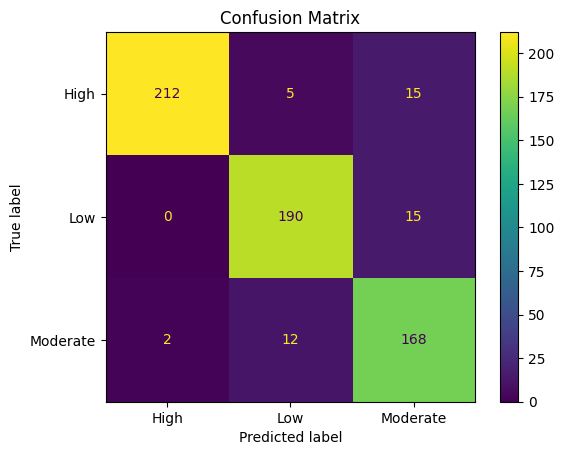

In [26]:
cm = confusion_matrix(model.predict(X_test),y_test)
disp = ConfusionMatrixDisplay(cm, display_labels=["High","Low","Moderate"])
disp.plot()
plt.title("Confusion Matrix")
plt.show()

## Let's note the important features of the dataset

In [27]:
feature_importances=model.feature_importances_
feature_importances_df=pd.DataFrame({'features':list(X_train), 'feature_importances':feature_importances})
feature_importances_df=pd.DataFrame({'features':list(X_train), 'feature_importances':feature_importances})
feature_importances_df.sort_values('feature_importances',ascending=False)

,features,feature_importances
7,Financial Condition,0.160238
1,Age,0.138414
10,Class Duration,0.127187
0,Gender,0.083639
9,Network Type,0.066403
5,Location,0.064986
8,Internet Type,0.063818
3,Institution Type,0.063551
2,Education Level,0.051524
11,Self Lms,0.050999
